<a href="https://colab.research.google.com/github/ElPapi42/global-happiness/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount gdrive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Copy CSVs to notebook runtime storage
!cp '/content/drive/MyDrive/Datasets/2015.csv' '/content/2015.csv'
!cp '/content/drive/MyDrive/Datasets/2016.csv' '/content/2016.csv'
!cp '/content/drive/MyDrive/Datasets/2017.csv' '/content/2017.csv'
!cp '/content/drive/MyDrive/Datasets/2018.csv' '/content/2018.csv'
!cp '/content/drive/MyDrive/Datasets/2019.csv' '/content/2019.csv'

In [4]:
from datetime import datetime

import pandas as pd
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

inline_rc = dict(mpl.rcParams)

# Load Datasets

In [5]:
data_15 = pd.read_csv('/content/2015.csv')
data_16 = pd.read_csv('/content/2016.csv')
data_17 = pd.read_csv('/content/2017.csv')
data_18 = pd.read_csv('/content/2018.csv')
data_19 = pd.read_csv('/content/2019.csv')

# Preprocess Datasets

### Clean 2015 Dataset

In [6]:
data_15.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [7]:
data_15 = data_15.rename(
    columns={
        'Country': 'country',
        'Region': 'region',
        'Happiness Rank': 'rank',
        'Happiness Score': 'score',
        'Economy (GDP per Capita)': 'economy',
        'Family': 'support',
        'Health (Life Expectancy)': 'health',
        'Freedom': 'freedom',
        'Trust (Government Corruption)': 'trust',
        'Generosity': 'generosity'
    }
)

data_15 = data_15.drop(columns=['Standard Error', 'Dystopia Residual'], errors='ignore')

data_15.head(2)

,country,region,rank,score,economy,support,health,freedom,trust,generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


### Clean 2016 Dataset

In [8]:
data_16.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [9]:
data_16 = data_16.rename(
    columns={
        'Country': 'country',
        'Region': 'region',
        'Happiness Rank': 'rank',
        'Happiness Score': 'score',
        'Economy (GDP per Capita)': 'economy',
        'Family': 'support',
        'Health (Life Expectancy)': 'health',
        'Freedom': 'freedom',
        'Trust (Government Corruption)': 'trust',
        'Generosity': 'generosity'
    }
)

data_16 = data_16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], errors='ignore')

data_16.head(2)

,country,region,rank,score,economy,support,health,freedom,trust,generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083


### Clean 2017 Dataset

In [10]:
data_17.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [11]:
data_17 = data_17.rename(
    columns={
        'Country': 'country',
        'Happiness.Rank': 'rank',
        'Happiness.Score': 'score',
        'Economy..GDP.per.Capita.': 'economy',
        'Family': 'support',
        'Health..Life.Expectancy.': 'health',
        'Freedom': 'freedom',
        'Trust..Government.Corruption.': 'trust',
        'Generosity': 'generosity'
    }
)

data_17 = data_17.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], errors='ignore')

data_17.head(2)

,country,rank,score,economy,support,health,freedom,generosity,trust
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770


### Clean 2018 Dataset

In [12]:
data_18.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [13]:
data_18 = data_18.rename(
    columns={
        'Country or region': 'country',
        'Overall rank': 'rank',
        'Score': 'score',
        'GDP per capita': 'economy',
        'Social support': 'support',
        'Healthy life expectancy': 'health',
        'Freedom to make life choices': 'freedom',
        'Perceptions of corruption': 'trust',
        'Generosity': 'generosity'
    }
)

data_18.head(2)

,rank,country,score,economy,support,health,freedom,generosity,trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


### Clean 2019 Dataset

In [14]:
data_19.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [15]:
data_19 = data_19.rename(
    columns={
        'Country or region': 'country',
        'Overall rank': 'rank',
        'Score': 'score',
        'GDP per capita': 'economy',
        'Social support': 'support',
        'Healthy life expectancy': 'health',
        'Freedom to make life choices': 'freedom',
        'Perceptions of corruption': 'trust',
        'Generosity': 'generosity'
    }
)

data_19.head(2)

,rank,country,score,economy,support,health,freedom,generosity,trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


PD: On years 2015-2017 Social support was connoted as 'Family', instead of 'Social support', for consistency on the aggregation of data, we keep it defined as 'support' across all the datasets

# Datasets Aggregation

### Append Year Data

We will perform aggregation later, but first, we need to add the year data to each dataset, for not to lose track of what year a record for each country was taken

In [16]:
data_15['date'] = pd.Series(data=[datetime(year=2015, month=1, day=1) for i in range(len(data_15))])
data_16['date'] = pd.Series(data=[datetime(year=2016, month=1, day=1) for i in range(len(data_16))])
data_17['date'] = pd.Series(data=[datetime(year=2017, month=1, day=1) for i in range(len(data_17))])
data_18['date'] = pd.Series(data=[datetime(year=2018, month=1, day=1) for i in range(len(data_18))])
data_19['date'] = pd.Series(data=[datetime(year=2019, month=1, day=1) for i in range(len(data_19))])

### Append Region Data

2018 and 2019 Dataset has no country region data. This can be usefull for calculate stats about specific regions of the world, like latam, europe or asia. Lets fill that data.

In [17]:
data_15_sub = data_15[['country', 'region']]
data_16_sub = data_16[['country', 'region']]

countries_regions = pd.concat([data_15_sub, data_16_sub])
countries_regions = countries_regions.drop_duplicates()
countries_regions.index = countries_regions.country
countries_regions = countries_regions.drop(columns='country')
countries_regions.sample(frac=0.05)

,region
country,
Sweden,Western Europe
Libya,Middle East and Northern Africa
Guinea,Sub-Saharan Africa
Macedonia,Central and Eastern Europe
Bahrain,Middle East and Northern Africa
Russia,Central and Eastern Europe
Croatia,Central and Eastern Europe
Oman,Middle East and Northern Africa


Now we have a dataframe that contains all the available information about countries and regions in 2015 and 2016 datasets. Let put that data into the other datasets

In [18]:
def append_regions(series):
    try:
        series.region = countries_regions.loc[series.country].region
    except KeyError:
        series.region = None
    return series

data = pd.concat([data_15, data_16, data_17, data_18, data_19])

data = data.apply(
    func=append_regions,
    axis=1
)

data.describe()

,rank,score,economy,support,health,freedom,trust,generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


# Venezuela Data Analysis

First, lets review Venezuela Data

In [19]:
venezuela = data[data.country.str.contains('Venezuela')]
venezuela.index = venezuela.date

venezuela = venezuela.drop(columns=['date', 'country', 'region'])

venezuela

,rank,score,economy,support,health,freedom,trust,generosity
date,,,,,,,,
2015-01-01,23,6.810,1.044240,1.255960,0.720520,0.429080,0.110690,0.05841
2016-01-01,44,6.084,1.133670,1.033020,0.619040,0.198470,0.083040,0.04250
2017-01-01,82,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.06502
2018-01-01,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.05600
2019-01-01,108,4.707,0.960000,1.427000,0.805000,0.154000,0.047000,0.06400


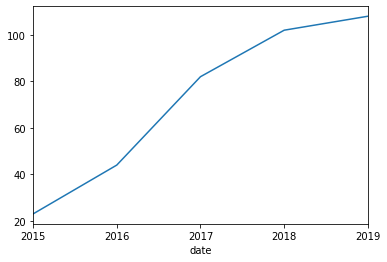

In [20]:
venezuela['rank'].plot()

In general, the rank keeps falling year to year.

Lets review the 'support' (aka social or family support), this can be interesting due to massive emigrations reported on past years, lets see:

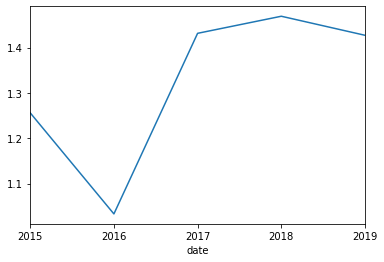

In [21]:
venezuela.support.plot()

2015 - 2016 lower levels of support coincide with the massive emigration at the time.

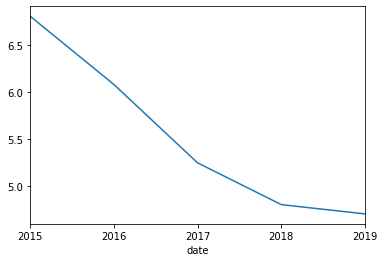

In [22]:
venezuela.score.plot()

A general decline in the score evience the general tendency to everything go worse from the pov of citizens

# Global

Let see how the world is doing. First, let review the general trend on the score across all the countries all the years

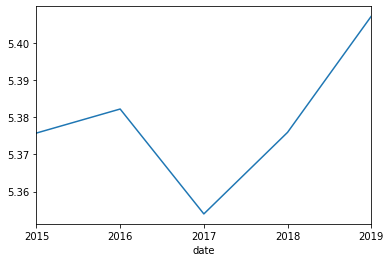

In [23]:
data.groupby(data.date).mean().score.plot()

The trend is more or less steady across the years, maybe more years can define a robust trend. The trand by region can give more insights.

The trust in government can be interesting to review

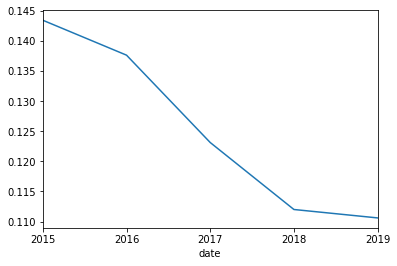

In [26]:
data.groupby(data.date).mean().trust.plot()

Government trust has a consistent negative trend across the years.

### Score by Region

Lets see how different regions score on the study

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


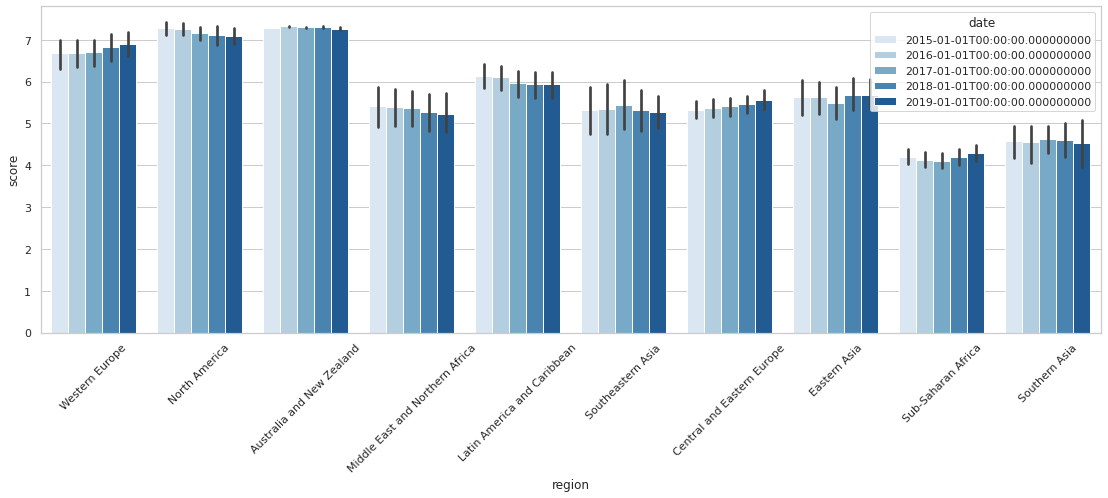

In [27]:
sn.set_theme(style='whitegrid', rc={'figure.figsize':(19,6)})
plot = sn.barplot(data=data, x='region', y='score', hue='date', palette='Blues')
plt.xticks(rotation=45)
sn.set_theme(rc=inline_rc)

Sub-Sahara Africa seems to have the lowest mean score across all the regions. North America has an steady decrease in score. Meanwhile, Eruope seems to have an steady increase in the mean score on countries of that regions.